In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func 

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()


In [40]:
# reflect an existing database into a new model
Base= automap_base()

# reflect the tables
Base.prepare(conn,reflect=True)

In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
measurement_class = Base.classes.measurement
station_class=Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [44]:
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [46]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [86]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Precipitation Analysis

In [49]:
# Find the most recent date in the data set.
most_recent =session.query(measurement_class.date).order_by(measurement_class.date.desc()).first()
most_recent

('2017-08-23',)

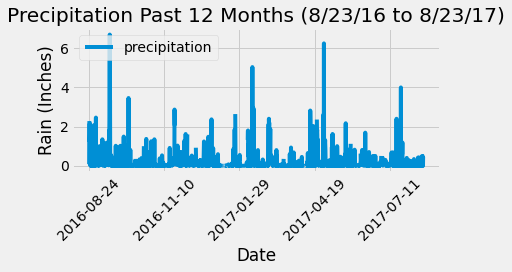

In [80]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago=dt.date(2017,8,23)-dt.timedelta(days=365)
year_ago
# Perform a query to retrieve the data and precipitation scores
prcp_query= session.query(measurement_class.date,measurement_class.prcp).filter(measurement_class.date>year_ago).order_by(measurement_class.date).all()
prcp_query
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(prcp_query,columns=['Date','precipitation'])
prcp_df.set_index("Date")
# Sort the dataframe by date
sorted_prcp=prcp_df.sort_values(["Date"], ascending = True)
sorted_prcp
# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp.plot("Date","precipitation")
plt.xlabel("Date")
plt.ylabel("Rain (Inches)")
plt.title("Precipitation Past 12 Months (8/23/16 to 8/23/17)")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_prcp.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [82]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [85]:
# Design a query to calculate the total number stations in the dataset
station_query=session.query(station_class.id).count()
station_query

9

In [95]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations= session.query(measurement_class.station, func.count(measurement_class.tobs)).group_by(measurement_class.station).order_by(func.count(measurement_class.tobs).desc()).all()

active_stations
most_active=active_stations[0][0]
print("The Busiest Station:", most_active,", Number of Observations:", active_stations[0][1])
print("Rest of Stations and Observations in Descending Order")
for station, count in active_stations:
    print("Station Number:",station,", Number of Observations:",count)

The Busiest Station: USC00519281 , Number of Observations: 2772
Rest of Stations and Observations in Descending Order
Station Number: USC00519281 , Number of Observations: 2772
Station Number: USC00519397 , Number of Observations: 2724
Station Number: USC00513117 , Number of Observations: 2709
Station Number: USC00519523 , Number of Observations: 2669
Station Number: USC00516128 , Number of Observations: 2612
Station Number: USC00514830 , Number of Observations: 2202
Station Number: USC00511918 , Number of Observations: 1979
Station Number: USC00517948 , Number of Observations: 1372
Station Number: USC00518838 , Number of Observations: 511


In [99]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures=session.query(measurement_class.station,measurement_class.date,measurement_class.tobs).filter(measurement_class.station==most_active).filter(measurement_class.date>year_ago).order_by(measurement_class.date).all()

Text(0, 0.5, 'Number of Observations')

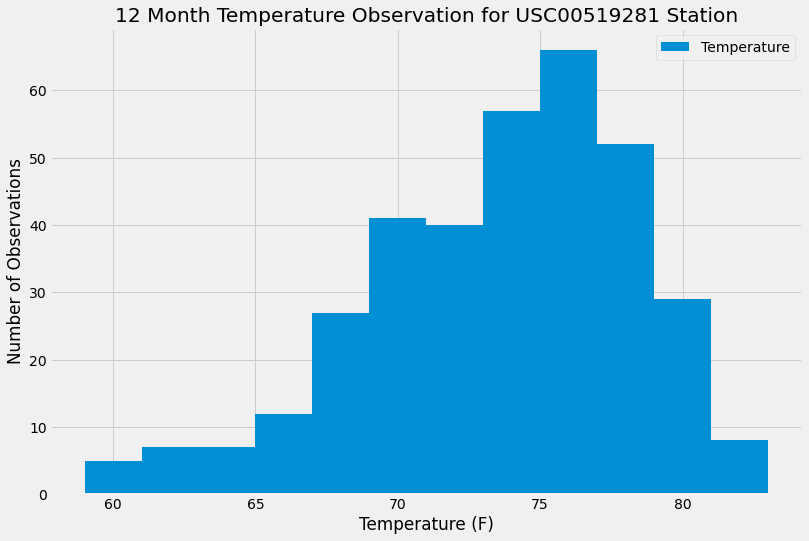

In [114]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df=pd.DataFrame(temperatures, columns=['Station','Date','Temperature'])
temp_df.plot.hist(by='station',bins=12,figsize=(12,8))
plt.legend(loc='best')
plt.title(f"12 Month Temperature Observation for {most_active} Station")
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Observations")

# Close session

In [ ]:
# Close Session
session.close()